<a href="https://colab.research.google.com/github/Vickey-VJ/Fake-News-Detection-using-MLP-Classifier/blob/main/fake_and_real_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Importing Fake news dataset
id = '1JwYL6tKmeXbceXgZQnmoXoKWKEq6imEg'
imported = drive.CreateFile({'id': id})
imported.GetContentFile('Fake.csv')

#Importing True news dataset
id2 = '1u9J32prZMHpB2NNBGsCXKkEZphY1QG_T'
imported = drive.CreateFile({'id': id2})
imported.GetContentFile('True.csv')

In [ ]:
# prompt: import pandas and read true and fake datasets from contents

import pandas as pd

# Read the True news dataset from its content
true_df = pd.read_csv('True.csv', encoding='utf-8')

# Read the Fake news dataset from its content
fake_df = pd.read_csv('Fake.csv', encoding='utf-8')


In [ ]:
true_df.head(20)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
fake_df.head(15)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
true_df.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [ ]:
fake_df.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [ ]:
#finding missing datas
def missing_data(data):
  total = len(data)
  for col in data.columns:
    missing = data[col].isnull().sum()
    print('{} - {}%'.format(col, round(missing/total*100)))

In [ ]:
missing_data(true_df)

title - 0%
text - 0%
subject - 0%
date - 0%


In [ ]:
missing_data(fake_df)

title - 0%
text - 0%
subject - 0%
date - 0%


In [ ]:
#removing duplicates
def remove_duplicates(data):
  print("\nCleaning Summary\n{}".format("-"*35))
  print(f"Before: {data.shape}")
  data.drop_duplicates(inplace=True)
  print(f"After: {data.shape}")

In [ ]:
remove_duplicates(true_df)


Cleaning Summary
-----------------------------------
Before: (21417, 4)
After: (21211, 4)


In [ ]:
remove_duplicates(fake_df)


Cleaning Summary
-----------------------------------
Before: (23481, 4)
After: (23478, 4)


In [ ]:
df_merged = pd.merge(fake_df, true_df, how='outer')

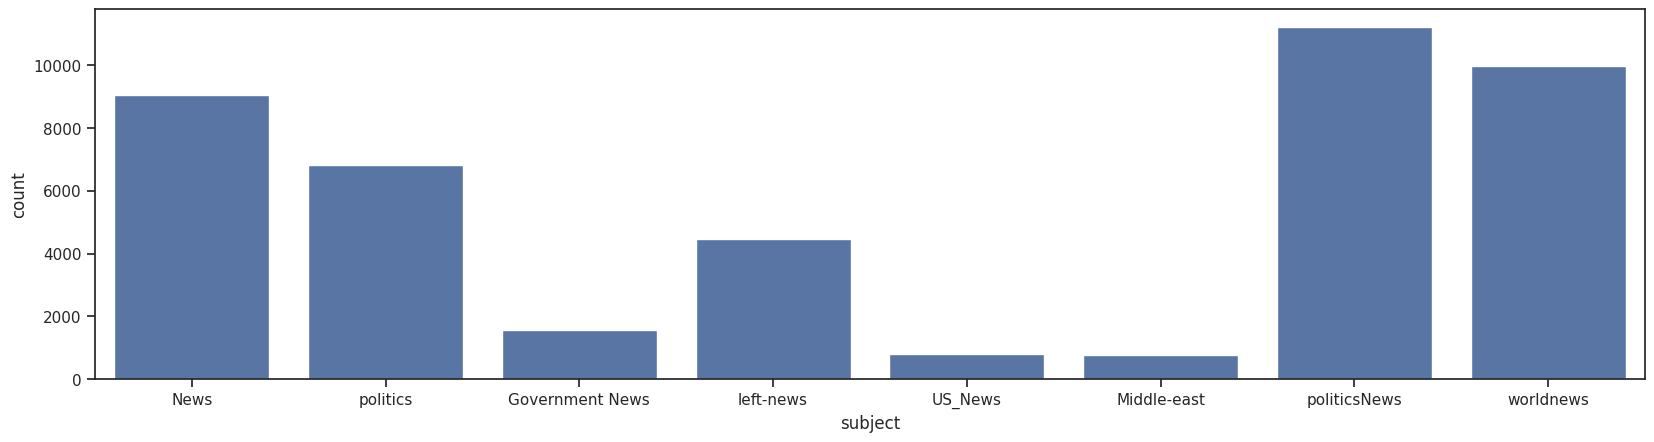

In [ ]:
#data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks",color_codes = True)

fig_dims = (20,4.8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x = 'subject', ax=ax,data = df_merged);
plt.show()

In [ ]:
fake_df['label'] = 0
true_df['label'] = 1

In [ ]:
df_train = pd.merge(fake_df, true_df, how='outer')

Remove stopwords and punctuations

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
def text_process(text):
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

###Model creation and Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train['title'], df_train['label'], test_size=0.2, random_state=42)

In [ ]:
#Deep learning multiple perceptron nueral network binary classifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

news_classifier = Pipeline([
    ('vect', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('clf', MLPClassifier(solver = "adam", activation = 'tanh',
                         #hidden_layer_sizes=(100,10),
                          random_state=1,
                          max_iter = 200,
                          early_stopping=True))])

In [ ]:
news_classifier.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function text_process at 0x7a4cb41d0af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MLPClassifier(activation='tanh', early_stopping=True,
                               hidden_layer_sizes=(100, 10), random_state=1))])

###MOdel evaluation

In [ ]:
predicted = news_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4205

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



Saving and download model

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(news_classifier, 'model.pkl')

['model.pkl']

In [ ]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [ ]:
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'model.pkl',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('model.pkl',
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1X8M5-_hYrxLNqa_IpZ2bhWKPFuEMuc1f


###Model deployment

In [ ]:
# Dependencies
from flask import Flask, request, jsonify
import joblib
import traceback

# Your API definition
app = Flask(__name__)

@app. route('/predict', methods=['POST'])
def predict():
  if model:
    try:
      json_ = request.json
      print(json_)
      prediction = model.predict(json_)

      return jsonify({'prediction': str(prediction)})

    except:
      return jsonify({'trace': traceback.format_exc()})
  else:
      return ('Model has not been trained')

try:
  port = int(sys.argv[1])
except:
  port = 8484

model = joblib.load('model.pkl')
print('Model loaded')

app.run(port=port, debug=True)

Model loaded
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8484
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
news_title = ['Trump got attacked']
prediction = news_classifier.predict(news_title)
prediction

array([0])